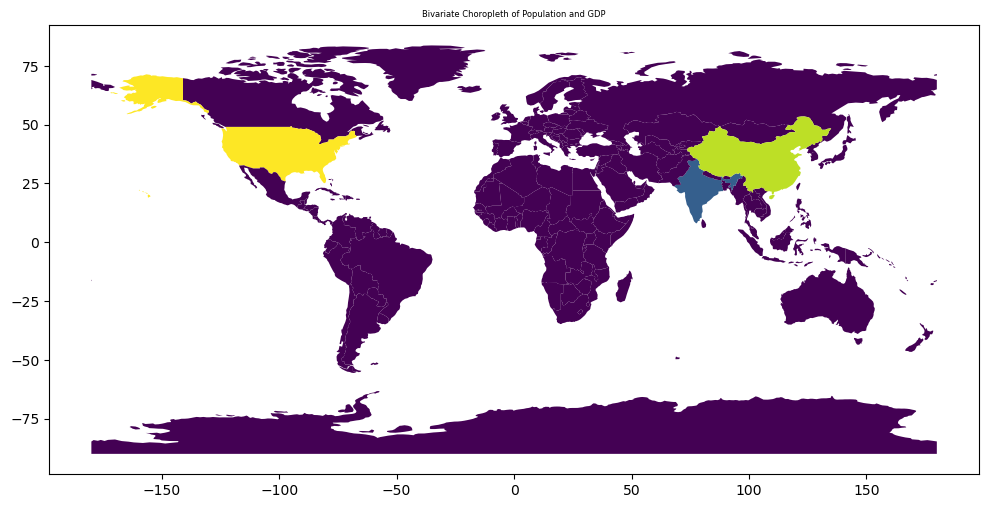

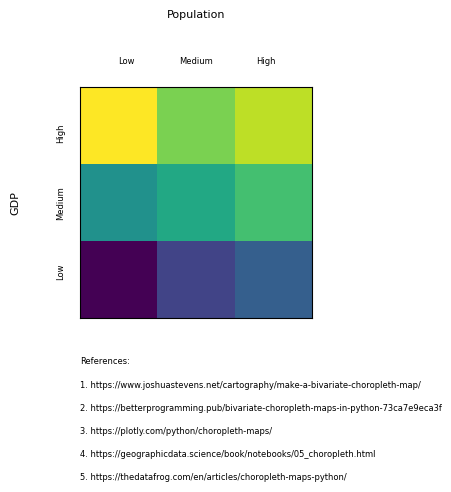

In [1]:
# World_Bivariate_GDP_Pop Analysis

# Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define font size
font_size = 6

# Load the dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Classify 'pop_est' into 3 classes
world['pop_class'] = pd.cut(world['pop_est'], bins=3, labels=[1, 2, 3])

# Classify 'gdp_md_est' into 3 classes
world['gdp_class'] = pd.cut(world['gdp_md_est'], bins=3, labels=[1, 2, 3])

# Create a new column 'Bi_Class'
world['Bi_Class'] = world['pop_class'].astype(str) + world['gdp_class'].astype(str)

# Create a color dictionary
color_dict = {'11': plt.cm.viridis(0), '12': plt.cm.viridis(0.5), '13': plt.cm.viridis(1.0),
              '21': plt.cm.viridis(0.2), '22': plt.cm.viridis(0.6), '23': plt.cm.viridis(0.8),
              '31': plt.cm.viridis(0.3), '32': plt.cm.viridis(0.7), '33': plt.cm.viridis(0.9)}

# Plot the bivariate choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
world.plot(color=world['Bi_Class'].map(lambda x: color_dict[x]), ax=ax)
ax.set_title('Bivariate Choropleth of Population and GDP', fontsize=font_size)

# Create a new figure and axes for the legend
fig, ax = plt.subplots(figsize=(3, 3))

# Add patches to the axes
for i in range(3):
    for j in range(3):
        ax.add_patch(patches.Rectangle((i/3, j/3), 1/3, 1/3, facecolor=color_dict[str(i+1)+str(j+1)]))

# Add labels
ax.text(-0.1, 0.8, 'High', va='center', rotation='vertical', fontsize=font_size)
ax.text(-0.1, 0.5, 'Medium', va='center', rotation='vertical', fontsize=font_size)
ax.text(-0.1, 0.2, 'Low', va='center', rotation='vertical', fontsize=font_size)
ax.text(0.2, 1.1, 'Low', ha='center', fontsize=font_size)
ax.text(0.5, 1.1, 'Medium', ha='center', fontsize=font_size)
ax.text(0.8, 1.1, 'High', ha='center', fontsize=font_size)

# Add axis labels
ax.text(-0.3, 0.5, 'GDP', va='center', rotation='vertical', fontsize=font_size+2)
ax.text(0.5, 1.3, 'Population', ha='center', fontsize=font_size+2)

# Add references
ax.text(0, -0.2, 'References:', ha='left', fontsize=font_size)
ax.text(0, -0.3, '1. https://www.joshuastevens.net/cartography/make-a-bivariate-choropleth-map/', ha='left', fontsize=font_size)
ax.text(0, -0.4, '2. https://betterprogramming.pub/bivariate-choropleth-maps-in-python-73ca7e9eca3f', ha='left', fontsize=font_size)
ax.text(0, -0.5, '3. https://plotly.com/python/choropleth-maps/', ha='left', fontsize=font_size)
ax.text(0, -0.6, '4. https://geographicdata.science/book/notebooks/05_choropleth.html', ha='left', fontsize=font_size)
ax.text(0, -0.7, '5. https://thedatafrog.com/en/articles/choropleth-maps-python/', ha='left', fontsize=font_size)

# Adjust axes
ax.set_xticks([])
ax.set_yticks([])

# Show plot
plt.show()
